## Task 1: Prediction using Supervised Machine Learning

### Predict the percentage of an student based on the no. of study hours

"A Linear Regression Model is developed to predict a student's potential percentage based on their study hours invested."

#### Author: Ravi Chandrika

In [1]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns

from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split

from sklearn import metrics  
from sklearn.metrics import r2_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline


### Load and Understand Model

In [2]:
data = pd.read_csv("http://bit.ly/w-data")

#save data for local file
#data.to_csv('Student_Hours_Scores.csv')  

data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


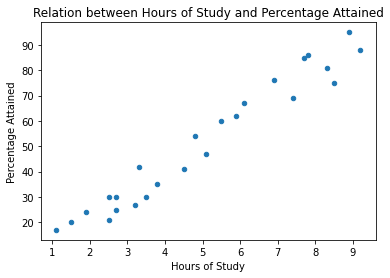

In [5]:
data.plot(x='Hours', y='Scores', kind='scatter')  
plt.title('Relation between Hours of Study and Percentage Attained')  
plt.xlabel('Hours of Study')  
plt.ylabel('Percentage Attained')  
plt.show()

We can see  a linear relationship between hours of study and percentage attained. This goes to show that if a candidate puts in more number of study hours he/ she is likely to score higher in the exams.


### Linear Regression Model Building

In [6]:
X = data['Hours'].to_numpy().reshape((-1, 1)) 
y =  data['Scores'].to_numpy()

### Test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
regressor = LinearRegression()  
model = regressor.fit(X_train, y_train)

print(f"intercept: {model.intercept_}")
print(f"coefficients: {model.coef_}")


intercept: 2.0181600414346974
coefficients: [9.91065648]


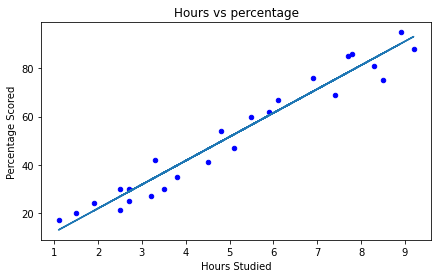

In [8]:
fitline= regressor.coef_[0] * X_train + regressor.intercept_

data.plot(x='Hours',y='Scores', kind='scatter', figsize=(7,4), color='b')
plt.plot(X_train,fitline)

plt.title('Hours vs percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

### Making Predictions and Model evaluation


In [9]:
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_pred, y_test)) 
print('r2 score (coefficient of determination):', r2_score(y_test,y_pred))
r=r2_score(y_test,y_pred)

Mean Absolute Error: 4.183859899002975
r2 score (coefficient of determination): 0.9454906892105355


### Comparing actual and predicted values


In [10]:
Actual_Prediction_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
Actual_Prediction_df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### OutPut
#### What will be a student's potential percentage if 9.25 hours of study are invested?

In [11]:
hours = 9.25
predicted_score = regressor.predict([[hours]]).round(2)

print("If a student invests \033[1m{}\033[0m hours in studying he/she is likely to get \033[1m{}%\033[0m".format(hours,predicted_score))

If a student invests 9.25 hours in studying he/she is likely to get [93.69]%


#### End of Task